In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url='https://drive.google.com/file/d/18k5egMOVxbM43DX5jHJsiP4WI0sdijLI/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url,names=[0,1,2])
df.head()
n=len(data[2].unique())
print(n)

7


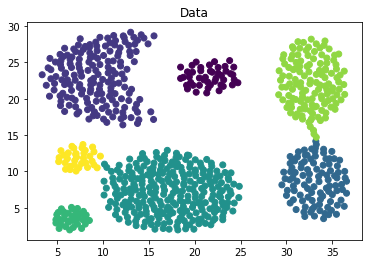

In [65]:
plt.scatter(data[0], data[1], c=data[2], cmap='viridis')
plt.title("Data")
plt.show()


points = data.drop([2]  ,axis=1)

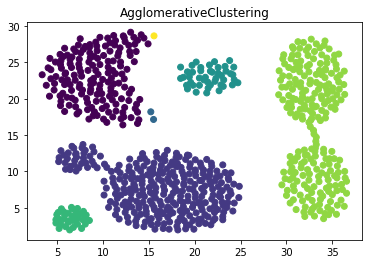

In [66]:
from sklearn.cluster import AgglomerativeClustering

AGcluster = AgglomerativeClustering(n_clusters=n, linkage='single')
z_km=AGcluster.fit_predict(points)
plt.scatter(points[0], points[1], c=z_km, cmap='viridis')
plt.title("AgglomerativeClustering")
plt.show()

In [67]:
D=[]
for i in range(0,len(points)):
    for j in range(i+1, len(points)):
        D.append(np.sqrt((points[0][i]-points[0][j])**2+(points[1][j])**2))


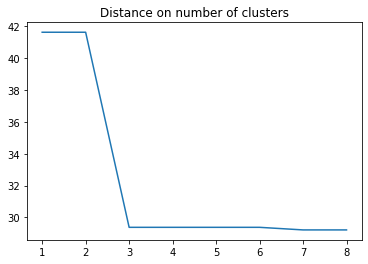

In [68]:
MaxDistanceValues=[]
for n in range(1,9):
    AGcluster= AgglomerativeClustering(n_clusters=n, linkage='single')
    z_km=AGcluster.fit_predict(points)
    
    Cd=[]
    for i in range(0,len(points)):
        for j in range(i+1, len(points)):
            Cd.append(z_km[i]-z_km[j])
    df=pd.DataFrame({"D":D,"Cd":Cd})
    df=df.loc[df["Cd"]==0]
    df=df.sort_values("D", ascending=False)
    MaxDistanceValues.append(df["D"][df.index[0]])
plt.plot(range(1,9), MaxDistanceValues)
plt.title("Distance on number of clusters")
plt.show()